# CASE STUDY 7B: Sentiment Analysis of Text Documents 

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png" align=left alt="CC BY license logo" /><br /><br />
Created by [Manika Lamba](http://manika-lamba.github.io) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments, email lambamanika07@gmail.com**<br />
____

In [1]:
#Load libraries
library(syuzhet)
library(tm)
library(twitteR)

Warning message:
"package 'syuzhet' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'twitteR' was built under R version 3.6.3"

In [2]:
#Load dataset
data<- read.csv("https://raw.githubusercontent.com/textmining-infopros/chapter7/master/7b_dataset.csv")

In [3]:
#Avoid error related to tolower() invalid multibyte string 
data[,sapply(data,is.character)] <- sapply(
  data[,sapply(data,is.character)],
  iconv,"WINDOWS-1252","UTF-8")

In [4]:
#syuzhet package works only on vectors. So, the data was converted to a vector
vector <- as.vector(t(data))

In [5]:
#Sentiment analysis
emotion.data <- get_nrc_sentiment(vector)
emotion.data2 <- cbind(data, emotion.data)
sentiment.score <- get_sentiment(vector)
sentiment.data = cbind(sentiment.score, emotion.data2)

Warning message:
"`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."Warning message:
"`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."Warning message:
"`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

In [6]:
#Getting positive, negative, and neutral reviews with associated scores
positive.reviews <- sentiment.data[which(sentiment.data$sentiment.score > 0),]
write.csv(positive.reviews, "positive.reviews.csv")

negative.reviews <- sentiment.data[which(sentiment.data$sentiment.score < 0),]
write.csv(negative.reviews, "negative.reviews.csv")

neutral.reviews <- sentiment.data[which(sentiment.data$sentiment.score == 0),]
write.csv(neutral.reviews, "neutral.reviews.csv")

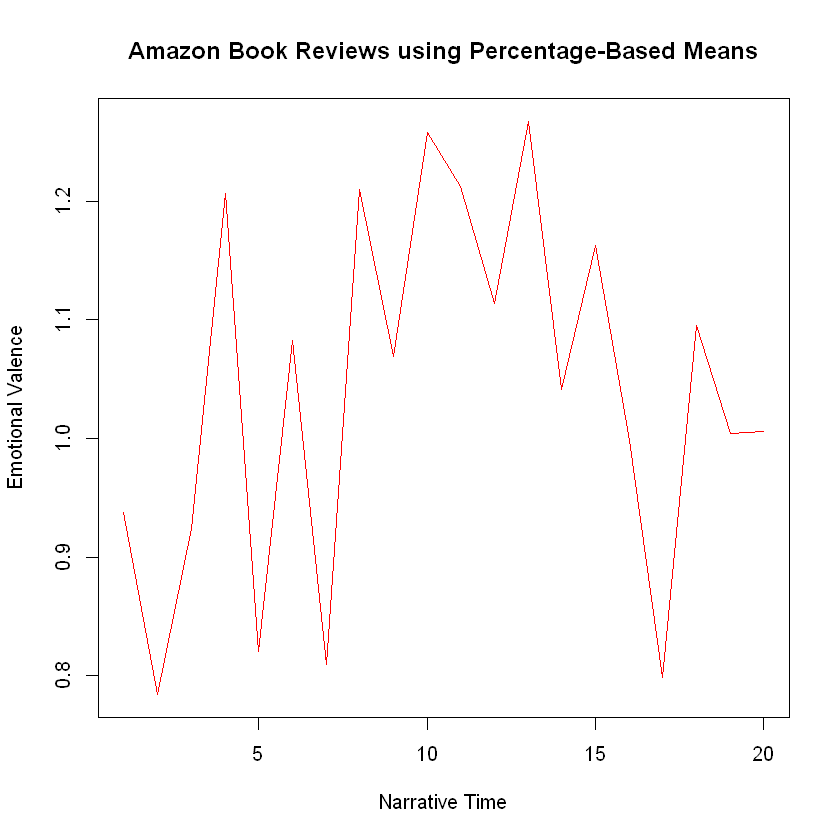

In [7]:
#Plot1: Percentage-Based Means
percent_vals <- get_percentage_values(sentiment.score, bins=20)

plot(percent_vals,
     type="l",
     main="Amazon Book Reviews using Percentage-Based Means",
     xlab="Narrative Time",
     ylab="Emotional Valence",
     col="red")

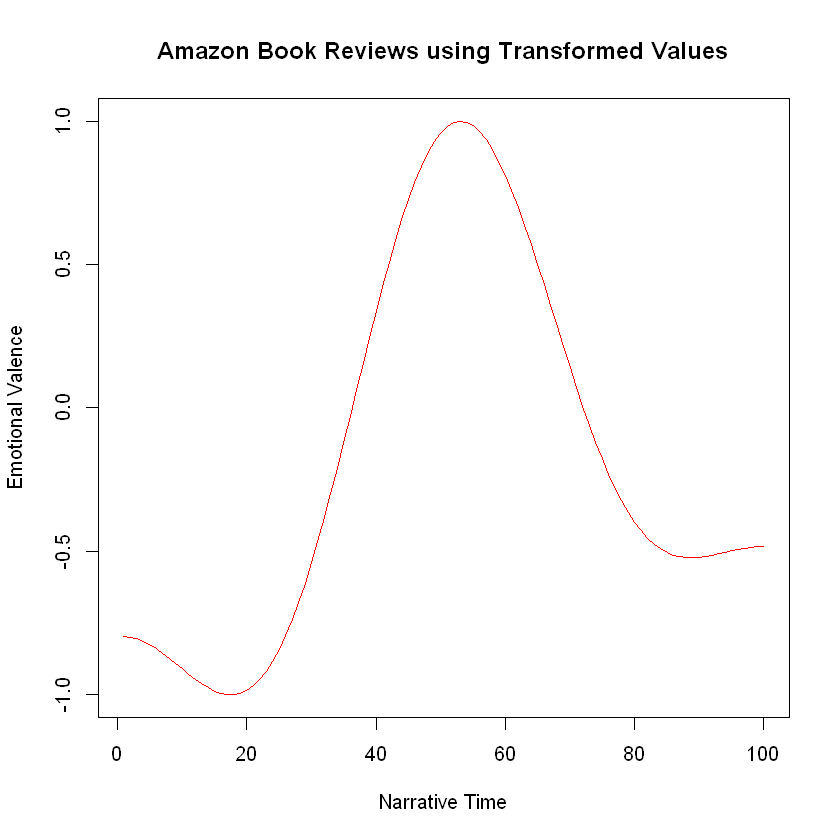

In [8]:
#Plot2: Discrete Cosine Transformation (DCT)
dct_values <- get_dct_transform(sentiment.score,
                                low_pass_size = 5,
                                x_reverse_len = 100,
                                scale_vals = F,
                                scale_range = T)

plot(dct_values,
     type ="l",
     main ="Amazon Book Reviews using Transformed Values",
     xlab = "Narrative Time",
     ylab = "Emotional Valence",
     col = "red")

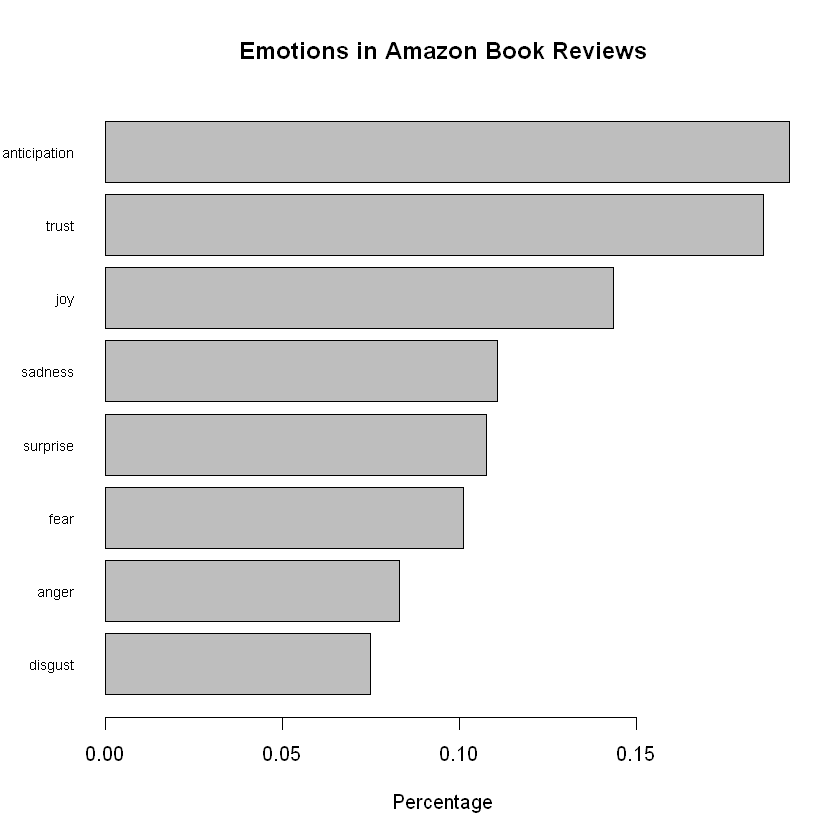

In [9]:
#Plot3: Emotions Graph
barplot(sort(colSums(prop.table(emotion.data[, 1:8]))),
        horiz=TRUE,
        cex.names=0.7,
        las=1,
        main="Emotions in Amazon Book Reviews",
        xlab = "Percentage")